# PROJECT 4

Data Availabale at: https://ucla.app.box.com/s/z45q3g5zrpay8b8gtbql6ojaecb7kj2u

Library Imports

In [4]:
library('igraph')
library('Matrix')
library('pracma')
library('readtext')
library('R.utils')
library('stringr')
library('foreach')
library('doParallel')


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union


Attaching package: ‘pracma’

The following objects are masked from ‘package:Matrix’:

    expm, lu, tril, triu



ERROR: Error in library("R.utils"): there is no package called ‘R.utils’


### Question 2 (part 2 - first part in python notebook)

In [1]:
targetFolder = "C:\\Users\\anoos\\Documents\\GitHub\\ECE-232E\\Project4\\"

In [2]:
# actorMap=read.csv("am.csv")
actorMap=read.csv("actorMap_v10.csv")

# actorMap
movieMap=read.csv("movieMap_v10.csv")
# movieMap

In [5]:
# el=read.csv("el2.csv")
el=read.csv("edgeList_v10.csv")
actorNetworkGraph=graph.data.frame(el)

IGRAPH 51e8b17 DNW- 113031 35467540 -- 
+ attr: name (v/c), weight (e/n)
+ edges from 51e8b17 (vertex names):
 [1] 1    ->3140  3140 ->1     1    ->3216  3216 ->1     1    ->3678 
 [6] 3678 ->1     1    ->4074  4074 ->1     1    ->4105  4105 ->1    
[11] 1    ->5772  5772 ->1     1    ->6519  6519 ->1     1    ->10890
[16] 10890->1     1    ->11309 11309->1     1    ->13135 13135->1    
[21] 1    ->13253 13253->1     1    ->13269 13269->1     1    ->14562
[26] 14562->1     1    ->14976 14976->1     1    ->14978 14978->1    
[31] 1    ->17230 17230->1     1    ->18151 18151->1     1    ->18438
[36] 18438->1     1    ->18613 18613->1     1    ->18759 18759->1    
+ ... omitted several edges

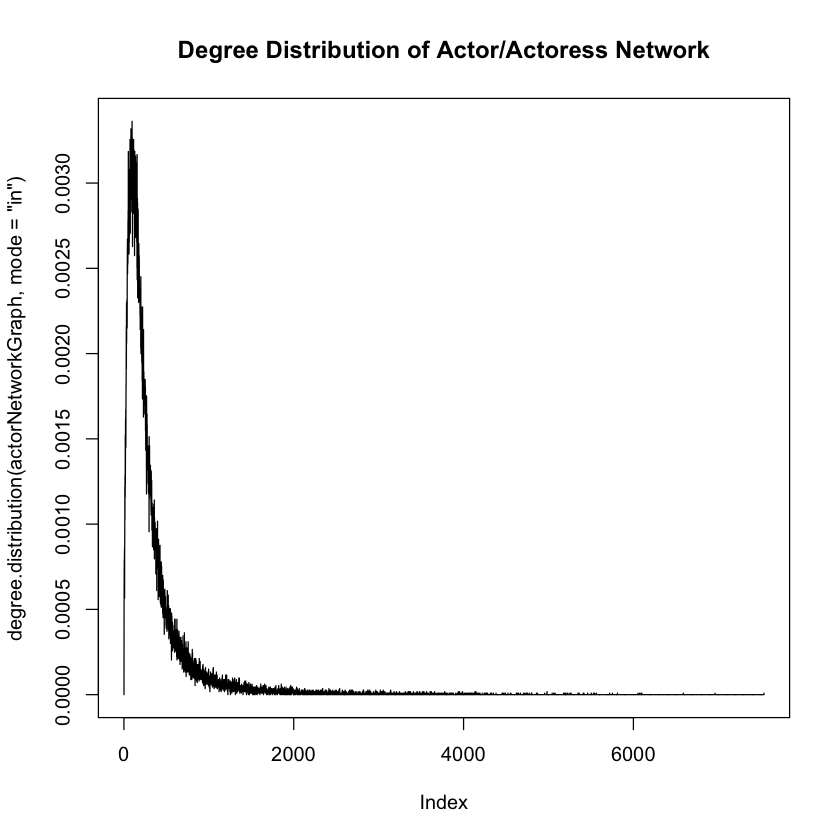

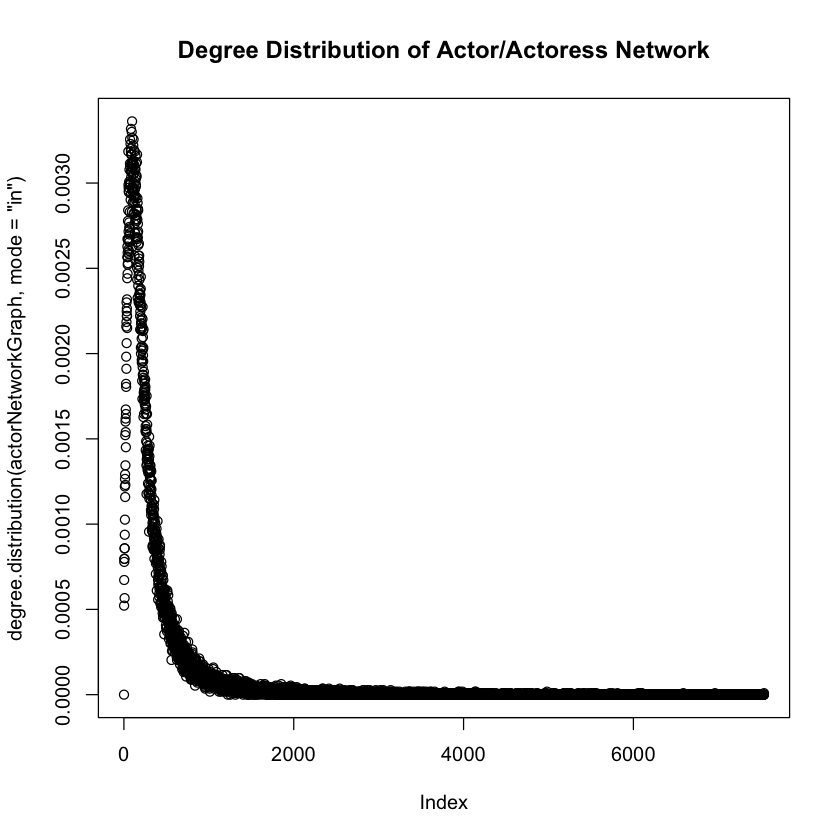

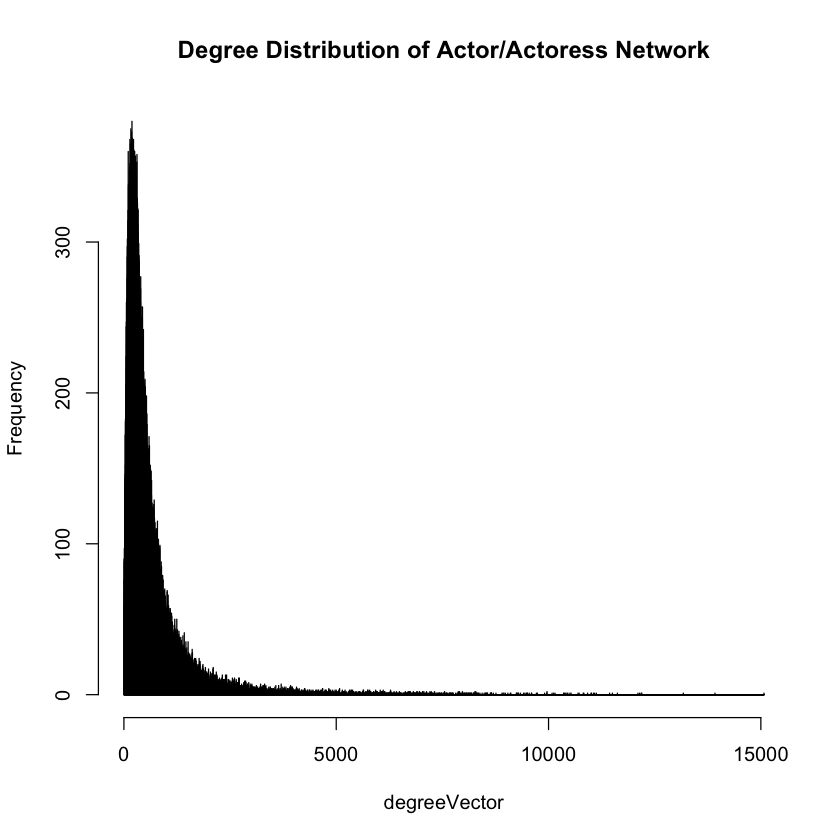

In [7]:
actorNetworkGraph
graphTitle = paste("Degree Distribution of Actor/Actoress Network")
plot(degree.distribution(actorNetworkGraph, mode="in"), main = graphTitle, type='l')
plot(degree.distribution(actorNetworkGraph, mode="in"), main = graphTitle)
degreeVector = degree(actorNetworkGraph)
hist(degreeVector, main = graphTitle, breaks = max(degreeVector) - min(degreeVector))

# V(g)$name
# E(g)$weight
# plot(g,layout=layout.fruchterman.reingold,edge.width=E(g)$weight*2,arrow.width=1)

### Question 3

In [27]:
getActorMapId = function (actorName){
    actorId = -1
    actorId = as.integer(actorMap$ID[[which(actorMap$Actor == actorName)]])
    return(actorId)
}
getActorMapId("Cruise, Tom")

[1] 14496

In [28]:
getActorName = function (actorId){
    idx = which(actorMap$ID == actorId)
    actorName = as.character(actorMap$Actor[[idx]])
    return(actorName)
}
getActorName(14496)

[1] "Cruise, Tom"

In [18]:
actorMap$ID[64529[]]

[1] 14496

In [29]:
getActorGraphId = function (actorMapId){
    actorVertexId = which(V(actorNetworkGraph)$name==actorMapId)
    return(actorVertexId)
}
getActorGraphId(14496)
V(actorNetworkGraph)[2]

[1] 24748

+ 1/113031 vertex, named, from 8ed3630:
[1] 3140

In [30]:
actorNameList = c("Cruise, Tom", "Watson, Emma (II)", "Clooney, George", "Hanks, Tom", "Johnson, Dwayne (I)", "Depp, Johnny", "Smith, Will (I)", "Streep, Meryl", "DiCaprio, Leonardo", "Pitt, Brad")
# actorNameList = c("Cruise, Tom")
for(actor in actorNameList){
    actorMapId = getActorMapId(actor)
    cat("\n\n",actor,"\n")
    print(actorMapId)
    outEdges = E(actorNetworkGraph)[from(getActorGraphId(actorMapId))]
#     print(outEdges)
    # outEdges$weight
    # max(outEdges$weight)
    prefActorEdgeList = outEdges[outEdges$weight == max(outEdges$weight)]
    print(length(prefActorEdgeList))
    for(i in c(1:length(prefActorEdgeList))){
        prefActorEdge = prefActorEdgeList[[i]]
        print(prefActorEdge)
        print(prefActorEdge$weight)
        prefActorMapId = as.integer(head_of(actorNetworkGraph, prefActorEdge)$name)
        print(prefActorMapId)
        prefActorName = getActorName(prefActorMapId)
        print(prefActorName)
    }

}



 Cruise, Tom 
[1] 14496
[1] 1
+ 1/35467540 edge from 8ed3630 (vertex names):
         tail  head   tid   hid    weight
9468247 14496 92138 24748 32272 0.1746032
[1] 0.1746032
[1] 92138
[1] "Kidman, Nicole"


 Watson, Emma (II) 
[1] 111280
[1] 1
+ 1/35467540 edge from 8ed3630 (vertex names):
           tail  head   tid   hid weight
27562418 111280 54773 32235 32371   0.52
[1] 0.52
[1] 54773
[1] "Radcliffe, Daniel"


 Clooney, George 
[1] 12806
[1] 1
+ 1/35467540 edge from 8ed3630 (vertex names):
         tail  head tid   hid   weight
8261081 12806 15201 242 14454 0.119403
[1] 0.119403
[1] 15201
[1] "Damon, Matt"


 Hanks, Tom 
[1] 27247
[1] 1
+ 1/35467540 edge from 8ed3630 (vertex names):
        tail head   tid   hid    weight
747128 27247 1194 10695 32009 0.1012658
[1] 0.1012658
[1] 1194
[1] "Allen, Tim (I)"


 Johnson, Dwayne (I) 
[1] 32378
[1] 3
+ 1/35467540 edge from 8ed3630 (vertex names):
         tail head   tid   hid    weight
1872994 32378 2950 15777 51447 0.2051282
[1] 0.20

### Question 4 - PR

In [31]:
elSmall=read.csv("el2.csv")
# el=read.csv("edgeList_v2.csv")
actorNetworkGraphSmall=graph.data.frame(elSmall)

In [32]:
actorNetworkGraphSmall = actorNetworkGraph

In [33]:
#weights
# A numerical vector or NULL. This argument can be used to give edge weights for calculating the weighted PageRank of vertices. 
# If this is NULL and the graph has a weight edge attribute then that is used. 
# If weights is a numerical vector then it used, even if the graph has a weights edge attribute. 
# If this is NA, then no edge weights are used (even if the graph has a weight edge attribute.
startTime = proc.time()

pageRankVector = page_rank(actorNetworkGraphSmall, directed = TRUE, damping = 0.85, weights = NULL)$vector
# pageRankVector
# pageRankVectorSorted = sort(pageRankVector, index.return=TRUE, decreasing=TRUE)
pageRankVectorSorted = sort(pageRankVector, index.return=FALSE, decreasing=TRUE)

pageRankVectorSortedVal = pageRankVectorSorted
# pageRankVectorSortedIdx = pageRankVectorSorted$ix
endTime = proc.time()
print(endTime - startTime)


   user  system elapsed 
 48.084  14.321  68.822 


In [34]:
startTime = proc.time()

pageRankVectorTop10Val = pageRankVectorSortedVal[1:10]
# pageRankVectorTop10Idx = pageRankVectorSortedIdx[1:10]
pageRankVectorTop10ActorId  = as.integer(names(pageRankVectorTop10Val))

pageRankVectorTop10Val
# pageRankVectorTop10ActorId

pageRankVectorTop10ActorGraphId = c()
for(actorId in pageRankVectorTop10ActorId){
    pageRankVectorTop10ActorGraphId = c(pageRankVectorTop10ActorGraphId, getActorGraphId(actorId))
}
# pageRankVectorTop10ActorGraphId
# pageRankVectorTop10Idx
inDegreeDist = degree(actorNetworkGraphSmall, mode = "in", v = pageRankVectorTop10ActorGraphId)
# inDegreeDist
cat("GId","\t","Id","\t","InDeg","\t","count","\t","actorPrVal","\t","Name","\n")

for(i in c(1:length(pageRankVectorTop10ActorId))){
    actorId = pageRankVectorTop10ActorId[[i]]
    actorGId = pageRankVectorTop10ActorGraphId[[i]]
    actorInDeg = inDegreeDist[[i]]
    actorMoviesCount = -1
    actorPrVal = pageRankVectorTop10Val[[i]]
    cat(actorGId,"\t",actorId,"\t",actorInDeg,"\t",actorMoviesCount,"\t",actorPrVal,"\t",getActorName(actorId),"\n")
}
endTime = proc.time()
print(endTime - startTime)

85716        65932        27632         6536        45407        32119 
0.0002351823 0.0001988842 0.0001972479 0.0001954274 0.0001727549 0.0001586007 
       52775        40341        18104        49642 
0.0001573493 0.0001565731 0.0001517121 0.0001469828

GId 	 Id 	 InDeg 	 count 	 actorPrVal 	 Name 
1830 	 85716 	 7537 	 -1 	 0.0002351823 	 Flowers, Bess 
670 	 65932 	 3951 	 -1 	 0.0001988842 	 Tatasciore, Fred 
1451 	 27632 	 6960 	 -1 	 0.0001972479 	 Harris, Sam (II) 
23838 	 6536 	 3313 	 -1 	 0.0001954274 	 Blum, Steve (IX) 
1574 	 45407 	 6587 	 -1 	 0.0001727549 	 Miller, Harold (I) 
37 	 32119 	 2905 	 -1 	 0.0001586007 	 Jeremy, Ron 
3767 	 52775 	 5563 	 -1 	 0.0001573493 	 Phelps, Lee (I) 
22581 	 40341 	 2656 	 -1 	 0.0001565731 	 Lowenthal, Yuri 
23931 	 18104 	 2951 	 -1 	 0.0001517121 	 Downes, Robin Atkin 
1610 	 49642 	 5502 	 -1 	 0.0001469828 	 O'Connor, Frank (I) 
   user  system elapsed 
  0.149   0.056   0.216 


### QUESTION 5

In [35]:
startTime = proc.time()

actorNameList = c("Cruise, Tom", "Watson, Emma (II)", "Clooney, George", "Hanks, Tom", "Johnson, Dwayne (I)", "Depp, Johnny", "Smith, Will (I)", "Streep, Meryl", "DiCaprio, Leonardo", "Pitt, Brad")
# actorNameList = c("Bey, Yasiin","$hort, Too","Bachar, Dian")
# actorNameList = c("Cruise, Tom")

actorIdList = c()
actorGraphIdList = c()
actorPrValList = c()
for(actorName in actorNameList){
    actorId = getActorMapId(actorName)
    actorIdList = c(actorIdList, actorId)
    actorGraphIdList = c(actorGraphIdList, getActorGraphId(actorId))
}
# actorIdList
# actorGraphIdList

actorInDegreeDist = degree(actorNetworkGraphSmall, mode = "in", v = actorGraphIdList)

for(actorId in actorIdList){
    actorPrVal = pageRankVector[which(names(pageRankVector) == actorId)]
    actorPrValList = c(actorPrValList, as.double(actorPrVal))
}
# actorPrValList
cat("GId","\t","Id","\t\t","InDeg","\t","count","\t","actorPrVal","\t","Name","\n")
for(i in c(1:length(actorIdList))){
    actorId = actorIdList[[i]]
    actorGId = actorGraphIdList[[i]]
    actorInDeg = actorInDegreeDist[[i]]
    actorMoviesCount = -1
    actorPrVal = actorPrValList[[i]]
    
    cat(actorGId,"\t",actorId,"\t",actorInDeg,"\t",actorMoviesCount,"\t",actorPrVal,"\t",getActorName(actorId),"\n")
}
endTime = proc.time()
print(endTime - startTime)

GId 	 Id 		 InDeg 	 count 	 actorPrVal 	 Name 
24748 	 14496 	 1651 	 -1 	 3.975482e-05 	 Cruise, Tom 
32235 	 111280 	 453 	 -1 	 1.748835e-05 	 Watson, Emma (II) 
242 	 12806 	 1573 	 -1 	 4.003966e-05 	 Clooney, George 
10695 	 27247 	 2063 	 -1 	 5.103929e-05 	 Hanks, Tom 
15777 	 32378 	 1355 	 -1 	 4.191674e-05 	 Johnson, Dwayne (I) 
16194 	 16870 	 2144 	 -1 	 5.382631e-05 	 Depp, Johnny 
24214 	 62762 	 1318 	 -1 	 3.200278e-05 	 Smith, Will (I) 
2589 	 107814 	 1594 	 -1 	 3.962138e-05 	 Streep, Meryl 
19091 	 17277 	 1300 	 -1 	 3.16632e-05 	 DiCaprio, Leonardo 
25149 	 53239 	 1740 	 -1 	 4.302711e-05 	 Pitt, Brad 
   user  system elapsed 
  0.216   0.068   0.291 


In [ ]:
GId 	 Id 	 InDeg 	 count 	 actorPrVal 	 Name 
1830 	 85716 	 7537 	 -1 	 0.0002351823 	 Flowers, Bess 
670 	 65932 	 3951 	 -1 	 0.0001988842 	 Tatasciore, Fred 
1451 	 27632 	 6960 	 -1 	 0.0001972479 	 Harris, Sam (II) 
23838 	 6536 	 3313 	 -1 	 0.0001954274 	 Blum, Steve (IX) 
1574 	 45407 	 6587 	 -1 	 0.0001727549 	 Miller, Harold (I) 
37 	 32119 	 2905 	 -1 	 0.0001586007 	 Jeremy, Ron 
3767 	 52775 	 5563 	 -1 	 0.0001573493 	 Phelps, Lee (I) 
22581 	 40341 	 2656 	 -1 	 0.0001565731 	 Lowenthal, Yuri 
23931 	 18104 	 2951 	 -1 	 0.0001517121 	 Downes, Robin Atkin 
1610 	 49642 	 5502 	 -1 	 0.0001469828 	 O'Connor, Frank (I)

In [ ]:
GId 	 Id 		 InDeg 	 count 	 actorPrVal 	 Name 
24748 	 14496 	 1651 	 -1 	 3.975482e-05 	 Cruise, Tom 
32235 	 111280 	 453 	 -1 	 1.748835e-05 	 Watson, Emma (II) 
242 	 12806 	 1573 	 -1 	 4.003966e-05 	 Clooney, George 
10695 	 27247 	 2063 	 -1 	 5.103929e-05 	 Hanks, Tom 
15777 	 32378 	 1355 	 -1 	 4.191674e-05 	 Johnson, Dwayne (I) 
16194 	 16870 	 2144 	 -1 	 5.382631e-05 	 Depp, Johnny 
24214 	 62762 	 1318 	 -1 	 3.200278e-05 	 Smith, Will (I) 
2589 	 107814 	 1594 	 -1 	 3.962138e-05 	 Streep, Meryl 
19091 	 17277 	 1300 	 -1 	 3.16632e-05 	 DiCaprio, Leonardo 
25149 	 53239 	 1740 	 -1 	 4.302711e-05 	 Pitt, Brad 